In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree


def ts_train_test_split(X,y,test_size=0.35,random_state=42, shuffle=True, filtre = True, limite = 0):
    Xtemp, ytemp = X.copy(), y.copy()
    a= X.index - X.index[0]
    a= a.days
    Xtemp['id']=a
    ytemp['id']=a
    from sklearn.model_selection import train_test_split
    indices_train, indices_test=train_test_split(a.unique(), test_size=test_size,random_state=random_state, shuffle=shuffle)
    X_train = Xtemp[Xtemp['id'].isin(indices_train.values)]
    X_test = Xtemp[Xtemp['id'].isin(indices_test.values)]
    y_train = ytemp[ytemp['id'].isin(indices_train.values)]
    y_test = ytemp[ytemp['id'].isin(indices_test.values)]
    ####
    if filtre:
        c=y_test.groupby('id').max()>limite
        X_test = X_test.loc[y_test['id'].isin(c.index[c["elecWithoutEclairage"]])]
        y_test = y_test.loc[y_test['id'].isin(c.index[c["elecWithoutEclairage"]])]


    X_train = X_train.drop(["id"], axis=1)
    X_test = X_test.drop(["id"], axis=1)
    y_train = y_train.drop(["id"], axis=1)
    y_test = y_test.drop(["id"], axis=1)
    # print(y_test)
    
    
    return X_train, X_test, y_train, y_test

y=pd.read_csv("y_selected.csv", parse_dates=["date"], index_col="date")
X=pd.read_csv("A_dataComplet.csv", parse_dates=["date"], index_col="date")        
# X_train, X_test, y_train, y_test = ts_train_test_split(X,y,test_size=0.20,random_state=152, shuffle=True)
# rfr = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1, max_depth=5,max_features=0.33,min_samples_leaf=10)

X_train, X_test, y_train, y_test = ts_train_test_split(X,y,test_size=0.15,random_state=0, shuffle=True)
rfr = RandomForestRegressor(n_estimators=100, max_depth=5,max_features=0.7)
#y_train=y_train.values.ravel()
rfr.fit(X_train, y_train.values.ravel())
score = rfr.score(X_train, y_train.values.ravel())
# print("R-squared:", score) 
y_predTest = rfr.predict(X_test)
y_predTrain = rfr.predict(X_train)
rmseTest = mean_squared_error(y_test, y_predTest,squared=False)
rmseTrain = mean_squared_error(y_train, y_predTrain,squared=False)
print(rmseTrain,";",rmseTest)

77.1204187101391 ; 55.81256538554829


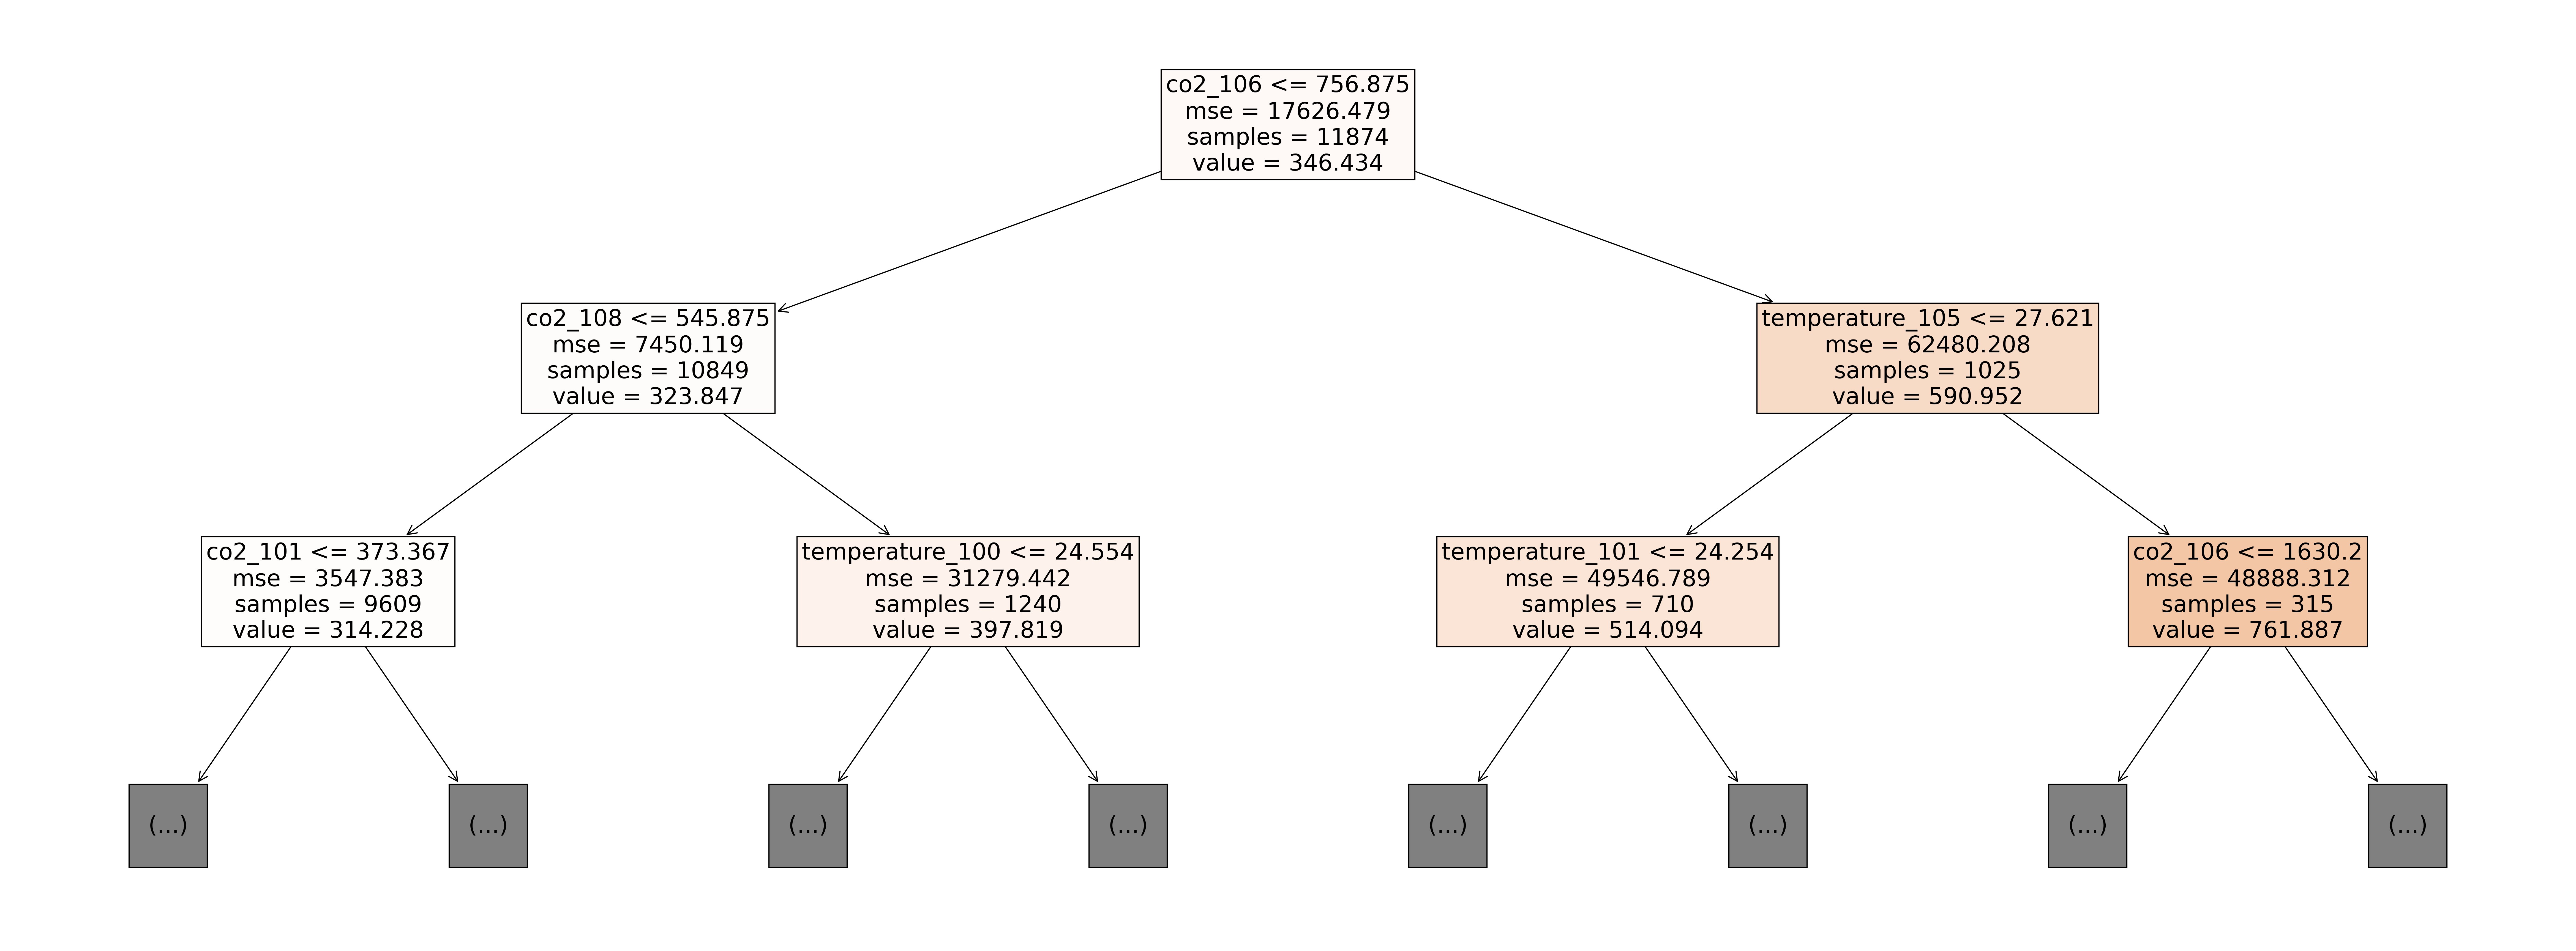

In [2]:
fn=X.columns.values
cn=y.columns.values
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15), dpi=300)
tree.plot_tree(rfr.estimators_[10],max_depth=2,fontsize=20,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree4.png')

In [67]:
power = 200
print("power;taux")
while (power< y['elecWithoutEclairage'].max()):
    power = power + 50
    taux = (y["elecWithoutEclairage"]>power).sum()/y.shape[0]*100
    print(power,";", taux)
    


power;taux
250 ; 97.74080086580086
300 ; 78.53986291486291
350 ; 14.127886002886003
400 ; 10.547438672438672
450 ; 8.125901875901874
500 ; 6.885822510822511
550 ; 5.830627705627705
600 ; 4.95580808080808
650 ; 4.2523448773448775
700 ; 3.7337662337662336
750 ; 3.242243867243867
800 ; 2.701118326118326
850 ; 2.0427489177489178
900 ; 1.618867243867244
950 ; 1.1408730158730158
1000 ; 0.8522727272727272
1050 ; 0.4825036075036075
1100 ; 0.27056277056277056
1150 ; 0.15331890331890333
1200 ; 0.07665945165945166
1250 ; 0.05411255411255411
1300 ; 0.040584415584415584
1350 ; 0.027056277056277056
1400 ; 0.018037518037518036
1450 ; 0.018037518037518036
1500 ; 0.013528138528138528
1550 ; 0.009018759018759018
1600 ; 0.009018759018759018
1650 ; 0.0


In [15]:
co2 = 300
print("co2 en ppm;taux")
while (co2< X["co2_106"].max()):
    co2 = co2 + 50
    taux = (X["co2_106"]>co2).sum()/y.shape[0]*100
    print(co2,";", taux)

co2 en ppm;taux
350 ; 98.27741702741703
400 ; 80.40223665223665
450 ; 36.516955266955264
500 ; 20.265151515151516
550 ; 15.566378066378068
600 ; 12.608225108225108
650 ; 10.818001443001442
700 ; 9.384018759018758
750 ; 8.148448773448774
800 ; 6.822691197691198
850 ; 5.812590187590187
900 ; 5.109126984126984
950 ; 4.504870129870129
1000 ; 4.0313852813852815
1050 ; 3.5804473304473303
1100 ; 3.1836219336219336
1150 ; 2.84992784992785
1200 ; 2.493686868686869
1250 ; 2.1825396825396823
1300 ; 1.8578643578643579
1350 ; 1.600829725829726
1400 ; 1.406926406926407
1450 ; 1.1408730158730158
1500 ; 0.8703102453102454
1550 ; 0.6313131313131313
1600 ; 0.5005411255411255
1650 ; 0.4283910533910534
1700 ; 0.30663780663780665
1750 ; 0.1984126984126984
1800 ; 0.15782828282828282
1850 ; 0.11724386724386725
1900 ; 0.06764069264069264
1950 ; 0.03156565656565657
2000 ; 0.022546897546897548
2050 ; 0.022546897546897548
2100 ; 0.022546897546897548
2150 ; 0.022546897546897548
2200 ; 0.018037518037518036
2250 ; 

In [27]:
X1=X.values[:,0]
X1=X1.reshape(-1,1)
y1=y.copy()
print(X1.shape, y1.shape)

(22176, 1) (22176, 1)


In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=152, shuffle=True)
rfr1 = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1, max_depth=5,max_features=0.33,min_samples_leaf=30)
#y_train=y_train.values.ravel()
rfr1.fit(X1_train, y1_train)
score = rfr1.score(X1_train, y1_train)
# print("R-squared:", score) 
y1_predTest = rfr1.predict(X1_test)
y1_predTrain = rfr1.predict(X1_train)
rmseTest1 = mean_squared_error(y1_test, y1_predTest,squared=False)
rmseTrain1 = mean_squared_error(y1_train, y1_predTrain,squared=False)
print(rmseTrain,";",rmseTest)

C:\Users\ahmed\AppData\Local\Temp/ipykernel_15208/507022808.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(X1_train, y1_train)


77.34014284147727 ; 54.97651652777548


In [30]:
import numpy as np
df = np.concatenate((X1, y1), axis=0)

In [31]:
np.corrcoef(X1, y1, rowvar=False)

array([[1.        , 0.60323769],
       [0.60323769, 1.        ]])

In [23]:
import pandas as pd
seeds =pd.read_csv("seeds.txt", header=None)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

co2=350
def ts_train_test_split(X,y,test_size=0.35,random_state=42, shuffle=True, filtre = True, limite = 0):
    Xtemp, ytemp = X.copy(), y.copy()
    a= X.index - X.index[0]
    a= a.days
    Xtemp['id']=a
    ytemp['id']=a
    from sklearn.model_selection import train_test_split
    indices_train, indices_test=train_test_split(a.unique(), test_size=test_size,random_state=random_state, shuffle=shuffle)
    X_train = Xtemp[Xtemp['id'].isin(indices_train.values)]
    X_test = Xtemp[Xtemp['id'].isin(indices_test.values)]
    y_train = ytemp[ytemp['id'].isin(indices_train.values)]
    y_test = ytemp[ytemp['id'].isin(indices_test.values)]
    ####
    if filtre:
        c=y_test.groupby('id').max()>limite
        X_test = X_test.loc[y_test['id'].isin(c.index[c["elecWithoutEclairage"]])]
        y_test = y_test.loc[y_test['id'].isin(c.index[c["elecWithoutEclairage"]])]


    X_train = X_train.drop(["id"], axis=1)
    X_test = X_test.drop(["id"], axis=1)
    y_train = y_train.drop(["id"], axis=1)
    y_test = y_test.drop(["id"], axis=1)
    # print(y_test)
    
    
    return X_train, X_test, y_train, y_test

y=pd.read_csv("y_selected.csv", parse_dates=["date"], index_col="date")
X=pd.read_csv("A_dataComplet.csv", parse_dates=["date"], index_col="date")        
# X_train, X_test, y_train, y_test = ts_train_test_split(X,y,test_size=0.20,random_state=152, shuffle=True)
# rfr = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1, max_depth=5,max_features=0.33,min_samples_leaf=10)
for seed in seeds[0]:
    X_train, X_test, y_train, y_test = ts_train_test_split(X,y,test_size=0.15,random_state=seed, shuffle=True)
    ptrain =(y_train["elecWithoutEclairage"]>co2).sum()/y_train.shape[0]*100
    ptest =(y_test["elecWithoutEclairage"]>co2).sum()/y_test.shape[0]*100
    print(seed,";",ptrain,";",ptest)
    



979 ; 15.560897435897436 ; 6.365740740740741
475 ; 16.02029914529915 ; 3.877314814814815
886 ; 14.604700854700855 ; 11.54513888888889
843 ; 15.101495726495726 ; 8.854166666666668
996 ; 15.411324786324787 ; 7.175925925925926
448 ; 14.423076923076922 ; 12.528935185185187
620 ; 15.005341880341879 ; 9.375
838 ; 15.085470085470085 ; 8.940972222222223
637 ; 15.77991452991453 ; 5.179398148148148
809 ; 15.480769230769232 ; 6.799768518518519
765 ; 14.39102564102564 ; 12.702546296296296
572 ; 12.980769230769232 ; 20.341435185185187
572 ; 12.980769230769232 ; 20.341435185185187
334 ; 14.86111111111111 ; 10.15625
127 ; 15.19764957264957 ; 8.333333333333332
6 ; 14.481837606837608 ; 12.210648148148149
84 ; 14.818376068376068 ; 10.387731481481481
187 ; 13.782051282051283 ; 16.00115740740741
401 ; 14.188034188034187 ; 13.802083333333334
973 ; 15.18696581196581 ; 8.391203703703704
299 ; 13.936965811965813 ; 15.162037037037038
27 ; 13.397435897435898 ; 18.08449074074074
691 ; 14.706196581196581 ; 10.995

## classification de la consommation élec

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X2, y2 = X,y//250
X_train, X_test, y_train, y_test = ts_train_test_split(X2,y2,test_size=0.25,random_state=42, shuffle=True)
clf = RandomForestClassifier(n_estimators = 100,oob_score = True,n_jobs = -1, max_depth=5,max_features=0.33,min_samples_leaf=30)
clf.fit(X_train, y_train)
print(y2.elecWithoutEclairage.unique())
clf.score(X_test,y_test)


C:\Users\ahmed\AppData\Local\Temp/ipykernel_27592/2956573847.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


[1. 0. 2. 3. 4. 6. 5.]


0.9305555555555556

In [103]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)
# confusion_matrix(y_true, y_pred)

In [104]:
for a,b in zip(y_test["elecWithoutEclairage"],y_pred):
    print(a,"  ",b)

1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0
1.0    1.0

In [38]:
y_pred


array([6., 6., 6., ..., 6., 6., 6.])